## Graph Theory (Math 454)

#### Aakash Madabhushi and Michael Neely


In [49]:
from collections import defaultdict,deque

In [50]:
graph = []

In [51]:
with open("../data/Cities_Illinois.txt") as f:
    for read in f:
        read = read.strip().split(" ")
        start_edge = str(read[0].lower())
        # print(start_edge)
        end_edge = str(read[1].lower())
        cost = int(read[2])
        graph.append((start_edge, end_edge, cost))


In [52]:
set_node = set()
for edge in graph:
    set_node.update([edge[0], edge[1]])

In [53]:
adjacency_list = {node:set() for node in set_node}
for edge in graph:
    adjacency_list[edge[0]].add((edge[1], edge[2]))

Input number of states to avoid and the states to avoid
i.e, 2,['Chicago','Berwyn']

Check if the state is in the list of states

remove the set node of the states to avoid

remove the key of the states to avoid and the value(tuple of end edge and cost) from the adjacency list

check if the set node or the adjacency list is empty

check if there are alternate paths to the end states
    - if there are, run usual dijkstra
    - if there are not, return None

In [61]:

class ShortestPath:
    def __init__(self,start,end,avoid=[]):
        self.start = start
        self.end = end
        self.avoid = avoid
        self.path,self.distance = self.dijkstra(start,end,avoid)
        self.path = list(self.path)
        self.distance = round(self.distance,2)
        self.path_string = " -> ".join(self.path)
    
    def __repr__(self):
        return f"Shortest Path: {self.path_string}\nDistance: {self.distance}"
    
    def dijkstra(self,start,end,avoid):
        # start = self.start
        # end = self.end
        # avoid = self.avoid
        unvisited_cities = set_node.copy()  # All nodes are initially unvisited.
        INFINITY = float("inf")
        adj = adjacency_list.copy()
        if avoid != []:
            for i in avoid:
                if (i == start or i == end) or (i == start and i == end):
                    print("No path exists")
                else:
                    temp = adjacency_list.copy()
                    indexing = adjacency_list.copy()
                    temp.pop(i)
                    for key, values in indexing.items():
                        for value in values.copy():
                            if i == value[0]:
                                temp[key].remove(value)
        
                    unvisited_cities.remove(i)
            adj = temp
        # print(adj)
        # print('-'*68)
        # print(unvisited_nodes)
        
        INFINITY = float("inf")
        #Created a dictionary of each city's distance from start and we update each city's distance whenever we find a path with the minimum edge cost
        distance_from_start = {
            node: (0 if node == start else INFINITY) for node in set_node
        }

        
        # We initialized all previous nodes to None on a dictionary that maps each city in Illinois to where it was visited from where the shortest path to it was found
        previous_node = {node: None for node in set_node}

        while unvisited_cities:
            
            #The current node is set to the unvisited node with the smallest distance from the start node.
            current_node = min(
                unvisited_cities, key=lambda node: distance_from_start[node]
            )
            unvisited_cities.remove(current_node)

            # If current_node's distance is inf, the remaining unvisited nodes are not connected to start_node, so we're done.
            #if not inf then Continue updating the distance_from_start dictionary and previous_node dictionary until we find a path
            if distance_from_start[current_node] != INFINITY:
                

            # For each neighbor of current_node, check whether the total distance to the neighbor via current_node is shorter than the distance we
            # currently have for that node. If it is, update the neighbor's values
            # for distance_from_start and previous_node.
                for neighbor, distance in adj[current_node]:
                    new_path = distance_from_start[current_node] + distance
                    if new_path < distance_from_start[neighbor]:
                        distance_from_start[neighbor] = new_path
                        previous_node[neighbor] = current_node
                
                path = deque()
                current_node = end
                while previous_node[current_node] is not None:
                    path.appendleft(current_node)
                    current_node = previous_node[current_node]
                path.appendleft(start)
            else:
                break
            
        return path,distance_from_start[end]

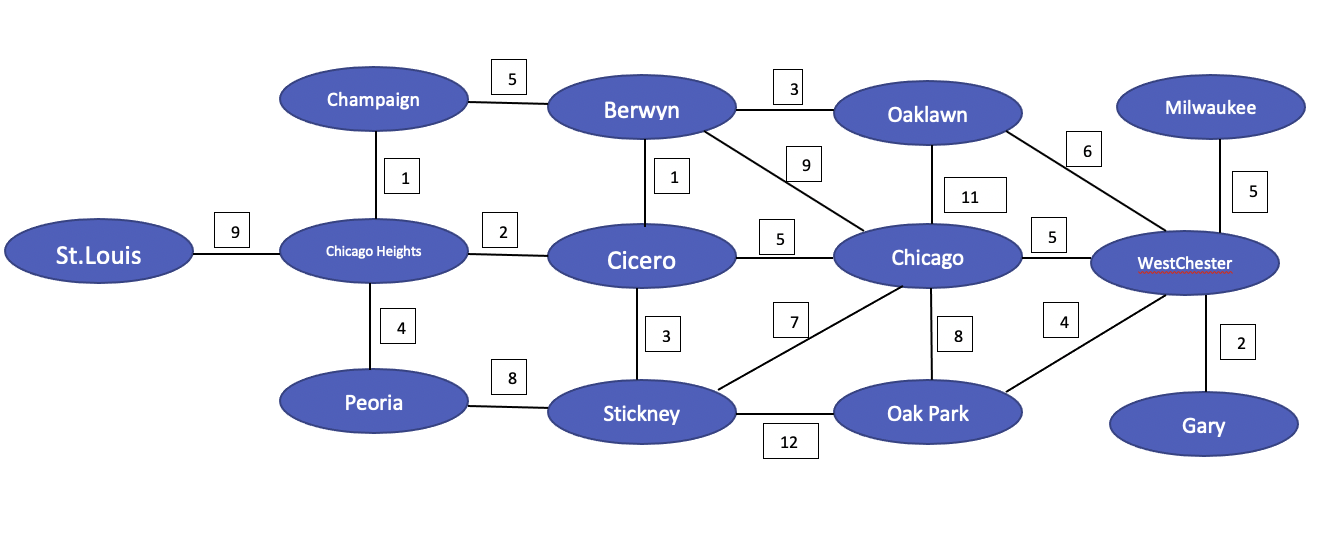

In [66]:
#Use map as reference to find the shortest path
from IPython.display import Image
Image(filename='../data/Screen Shot 2022-04-29 at 1.45.35 PM.png') 

In [67]:
lst1 = ["St.Louis","Chicago","Berwyn","Peoria"]
lst2 = ["Milwaukee","OakPark","Gary","Champaign"]
lst_avoid = ["cicero","stickney"]
#Use map to test the algorithm

for i in lst1:
    for j in lst2:
        s = ShortestPath(i.lower(),j.lower(),lst_avoid)
        print("Path: ",s.path_string)
        print("Distance Cost: ",s.distance)
        print('-'*20)


Path:  st.louis -> chicagoheights -> champaign -> berwyn -> oaklawn -> westchester -> milwaukee
Distance Cost:  29
--------------------
Path:  st.louis -> chicagoheights -> champaign -> berwyn -> oaklawn -> westchester -> oakpark
Distance Cost:  28
--------------------
Path:  st.louis -> chicagoheights -> champaign -> berwyn -> oaklawn -> westchester -> gary
Distance Cost:  26
--------------------
Path:  st.louis -> chicagoheights -> champaign
Distance Cost:  10
--------------------
Path:  chicago -> westchester -> milwaukee
Distance Cost:  10
--------------------
Path:  chicago -> oakpark
Distance Cost:  8
--------------------
Path:  chicago -> westchester -> gary
Distance Cost:  7
--------------------
Path:  chicago -> berwyn -> champaign
Distance Cost:  14
--------------------
Path:  berwyn -> oaklawn -> westchester -> milwaukee
Distance Cost:  14
--------------------
Path:  berwyn -> oaklawn -> westchester -> oakpark
Distance Cost:  13
--------------------
Path:  berwyn -> oaklawn 